# Project 3 - Supervised Machine Learning: Classification

This notebook is for the final project required for the IBM Machine Learning Certificate.

Data Source: 

The main objective of this analysis is to classify the fictional user as likely to spend money or not using Classification Methods

Notebook Contents:



>1. Simple EDA<br>
Descriptive statistics and data cleaning<br>
Numerical features<br>

>2. Train test split<br>

>3. Model variations<br>
Square Root Transformation<br>
Standard Scaling<br>
Adding Polynomial Features

>4. Cross-validation and Regularization<br>
K Nearest Neighbours<br>
Logistic Regression<br>
Decision Tree<br>
Support Vector Machine <br>
Comparing the metrics

>5. Model Evaluation using Test set<br>

In [7]:
import itertools
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, jaccard_score , f1_score , log_loss
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
import matplotlib.image as mpimg
from sklearn import tree
import scipy.optimize as opt
from sklearn import svm
from sklearn.linear_model import LogisticRegression

%matplotlib inline

In [8]:
# Loads in the dataset

data = pd.read_csv('/Users/qasimk/Downloads/ML/data/behaviour_3m.csv')

In [9]:
# Prints out the data shape

data.shape

(3000000, 5)

In [10]:
# Drops duplicates and checks the new data shape

data = data.drop_duplicates(keep='first').reset_index(drop=True)
data.shape

(2999993, 5)

## 1. Simple EDA
### Descriptive statistics and data cleaning

In [11]:
# Prints out the first 5 rows of the data set

data.head()

,user_id,ts,behaviour_type,consume,target_user
0,10928793,2018-05-12 17:19:20,dislike,0,27975344
1,32521526,2018-05-10 16:35:25,view,0,0
2,63353958,2018-05-30 18:48:58,voiceroom,0,0
3,84233255,2018-05-24 03:19:16,view,0,0
4,98010797,2018-04-18 07:36:07,view,0,0


In [12]:
# Info about the data set 

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2999993 entries, 0 to 2999992
Data columns (total 5 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   user_id         int64 
 1   ts              object
 2   behaviour_type  object
 3   consume         int64 
 4   target_user     int64 
dtypes: int64(3), object(2)
memory usage: 114.4+ MB


In [13]:
# Info abput the diffrent values of behaviour_type
 
data['behaviour_type'].value_counts()

view         563888
dislike      448510
voiceroom    416270
like         413939
click        318675
zan          313339
post         229844
comment      197854
follow        62642
buy           35032
Name: behaviour_type, dtype: int64

In [14]:
# One Hot Encoding the behaviour_type

userid_df = data[['user_id']]
data_ohc = pd.concat([userid_df,pd.get_dummies(data['behaviour_type'])], axis=1)

data_ohc

,user_id,buy,click,comment,dislike,follow,like,post,view,voiceroom,zan
0,10928793,0,0,0,1,0,0,0,0,0,0
1,32521526,0,0,0,0,0,0,0,1,0,0
2,63353958,0,0,0,0,0,0,0,0,1,0
3,84233255,0,0,0,0,0,0,0,1,0,0
4,98010797,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2999988,17775246,0,0,0,0,0,0,0,1,0,0
2999989,69288974,0,0,0,0,0,0,1,0,0,0
2999990,69497756,0,0,0,0,0,1,0,0,0,0
2999991,60503809,0,0,0,0,0,0,0,0,1,0


In [15]:
# Sum the columns based on user_id

data_ohc_clean = data_ohc.groupby(['user_id']).sum()
data_ohc_clean

,buy,click,comment,dislike,follow,like,post,view,voiceroom,zan
user_id,,,,,,,,,,
10006437,1,11,7,26,0,9,9,24,15,25
10013978,1,13,8,21,0,19,9,32,17,21
10015055,2,18,20,29,5,33,17,37,30,21
10022355,2,23,16,33,0,37,15,39,21,16
10024335,0,22,21,29,1,24,19,34,22,26
...,...,...,...,...,...,...,...,...,...,...
99959540,1,19,5,37,3,27,12,42,21,24
99967539,1,13,15,20,0,19,13,21,19,10
99974265,1,21,15,37,3,27,15,46,29,21


In [16]:
# One Hot Encoding the buy column

data_ohc_clean['buy'] = np.where(data_ohc_clean['buy'] == 0, 0, 1)
data_ohc_clean['buy'].value_counts()

1    8359
0    6641
Name: buy, dtype: int64

In [17]:
data_ohc_clean

,buy,click,comment,dislike,follow,like,post,view,voiceroom,zan
user_id,,,,,,,,,,
10006437,1,11,7,26,0,9,9,24,15,25
10013978,1,13,8,21,0,19,9,32,17,21
10015055,1,18,20,29,5,33,17,37,30,21
10022355,1,23,16,33,0,37,15,39,21,16
10024335,0,22,21,29,1,24,19,34,22,26
...,...,...,...,...,...,...,...,...,...,...
99959540,1,19,5,37,3,27,12,42,21,24
99967539,1,13,15,20,0,19,13,21,19,10
99974265,1,21,15,37,3,27,15,46,29,21


## 2. Train Test Split

In [18]:
# Splits the data into training & validation set and test set

train_and_val, test = train_test_split(data_ohc_clean, test_size=0.2, random_state=0)

print(f'Training and validation set size: {train_and_val.shape}')
print(f'Test set size: {test.shape}')

Training and validation set size: (12000, 10)
Test set size: (3000, 10)


In [19]:
# Splits the data into training set and validation set

train, val = train_test_split(train_and_val, test_size=0.25, random_state=0)

print(f'Training set size: {train.shape}')
print(f'Validation set size: {val.shape}')

Training set size: (9000, 10)
Validation set size: (3000, 10)


## 3. Model variations

In [20]:
# Spliting the data set

X_train, X_val, X_test = train.drop("buy", axis=1), val.drop("buy", axis=1), test.drop("buy", axis=1)
y_train, y_val, y_test = train["buy"], val["buy"], test["buy"]

# K Nearest Neighbor(KNN)

In [21]:
#Training the Model on the test set data

Ks = 100
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMtx=[];
for n in range(1,Ks):
    neigh = KNeighborsClassifier(n_neighbors=n).fit(X_train, y_train)
    y_pred = neigh.predict(X_val)
    mean_acc[n-1] = metrics.accuracy_score(y_val, y_pred)
    std_acc[n-1] = np.std(y_pred == y_val)/np.sqrt(y_pred.shape[0])

mean_acc

array([0.62766667, 0.63833333, 0.68366667, 0.67866667, 0.70166667,
       0.697     , 0.719     , 0.71766667, 0.72966667, 0.73      ,
       0.74      , 0.73933333, 0.73633333, 0.74066667, 0.73966667,
       0.74533333, 0.74633333, 0.74866667, 0.75      , 0.749     ,
       0.75      , 0.75166667, 0.751     , 0.75133333, 0.753     ,
       0.754     , 0.75566667, 0.75533333, 0.75533333, 0.75433333,
       0.75566667, 0.754     , 0.754     , 0.75533333, 0.755     ,
       0.755     , 0.755     , 0.75533333, 0.755     , 0.755     ,
       0.75566667, 0.75566667, 0.75566667, 0.75533333, 0.75533333,
       0.75533333, 0.75566667, 0.75533333, 0.75566667, 0.755     ,
       0.75533333, 0.755     , 0.75533333, 0.75533333, 0.75566667,
       0.75533333, 0.756     , 0.75566667, 0.756     , 0.75533333,
       0.75566667, 0.75566667, 0.75533333, 0.75533333, 0.75533333,
       0.75533333, 0.75566667, 0.755     , 0.75566667, 0.755     ,
       0.75566667, 0.75533333, 0.75566667, 0.75466667, 0.75533

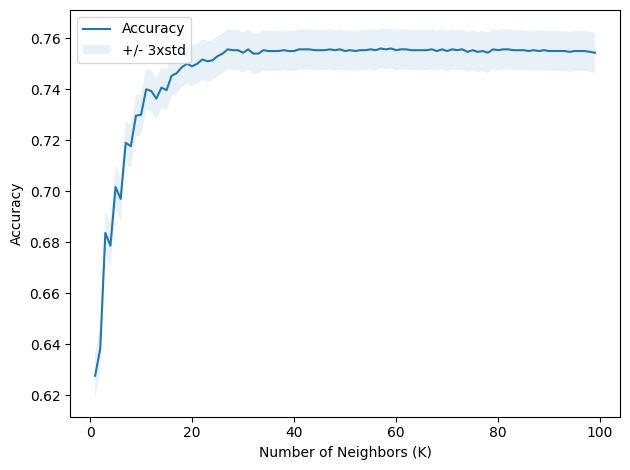

The best accuracy was with 0.756 with k= 57


In [22]:
plt.plot(range(1,Ks),mean_acc)
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy', '+/- 3xstd'))
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

neigh = KNeighborsClassifier(n_neighbors=mean_acc.argmax()+1).fit(X_train, y_train)

# Decision Tree

In [23]:
#Building the Model on the test set data

modeltree = DecisionTreeClassifier(criterion="entropy")
modeltree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [24]:
#Predictions on validation set

predTree = modeltree.predict(X_val)
print(list(predTree[0:10]))
print(list(y_val[0:10]))

[1, 1, 1, 0, 1, 1, 1, 0, 0, 0]
[1, 1, 1, 0, 0, 1, 1, 1, 0, 0]


# Support Vector Machine

In [25]:
#Building the Model on the test set data

clf = svm.SVC(kernel="sigmoid")
clf.fit(X_train, y_train)


SVC(kernel='sigmoid')

In [26]:
#Predictions on validation set

y_pred = clf.predict(X_val)

In [27]:
#Evaluation of the Model

f1_score(y_val,y_pred, average="weighted")

0.30024885565407644

# Logistic Regression

In [28]:
#Building the Model

LR = LogisticRegression(C=0.01, solver="liblinear").fit(X_train,y_train)

In [29]:
#Predictions on validation set

y_pred = LR.predict(X_val)
y_pred_prob = LR.predict_proba(X_val)

In [30]:
#Evaluation of the Model

jaccard_score(y_val,y_pred, average = "weighted")

0.5990988503682414

### Compare the metrics

In [58]:
knn_pred=neigh.predict(X_val)
jc1=jaccard_score(y_val, knn_pred)
fs1=f1_score(y_val, knn_pred, average='weighted')

tree_pred=modeltree.predict(X_val)
jc2=jaccard_score(y_val, tree_pred)
fs2=f1_score(y_val, tree_pred, average='weighted')

svm_pred=clf.predict(X_val)
jc3=jaccard_score(y_val, svm_pred)
fs3=f1_score(y_val, svm_pred, average='weighted')

log_pred=LR.predict(X_val)
proba=LR.predict_proba(X_val)
jc4=jaccard_score(y_val, log_pred)
fs4=f1_score(y_val, log_pred, average='weighted')  
ll4=log_loss(y_val, proba)

list_jc = [jc1, jc2, jc3, jc4]
list_fs = [fs1, fs2, fs3, fs4]
list_ll = ['NA', 'NA', 'NA', ll4]

In [59]:
# Metric report for diffrent Models on the Validation set

df = pd.DataFrame(list_jc, index=['KNN','Decision Tree','SVM','Logistic Regression'])
df.columns = ['Jaccard']
df.insert(loc=1, column='F1-score', value=list_fs)
df.insert(loc=2, column='LogLoss', value=list_ll)
df.columns.name = 'Algorithm'
df

Algorithm,Jaccard,F1-score,LogLoss
KNN,0.635640,0.755593,NA
Decision Tree,0.496138,0.629616,NA
SVM,0.228044,0.300249,NA
Logistic Regression,0.622556,0.748980,0.557872


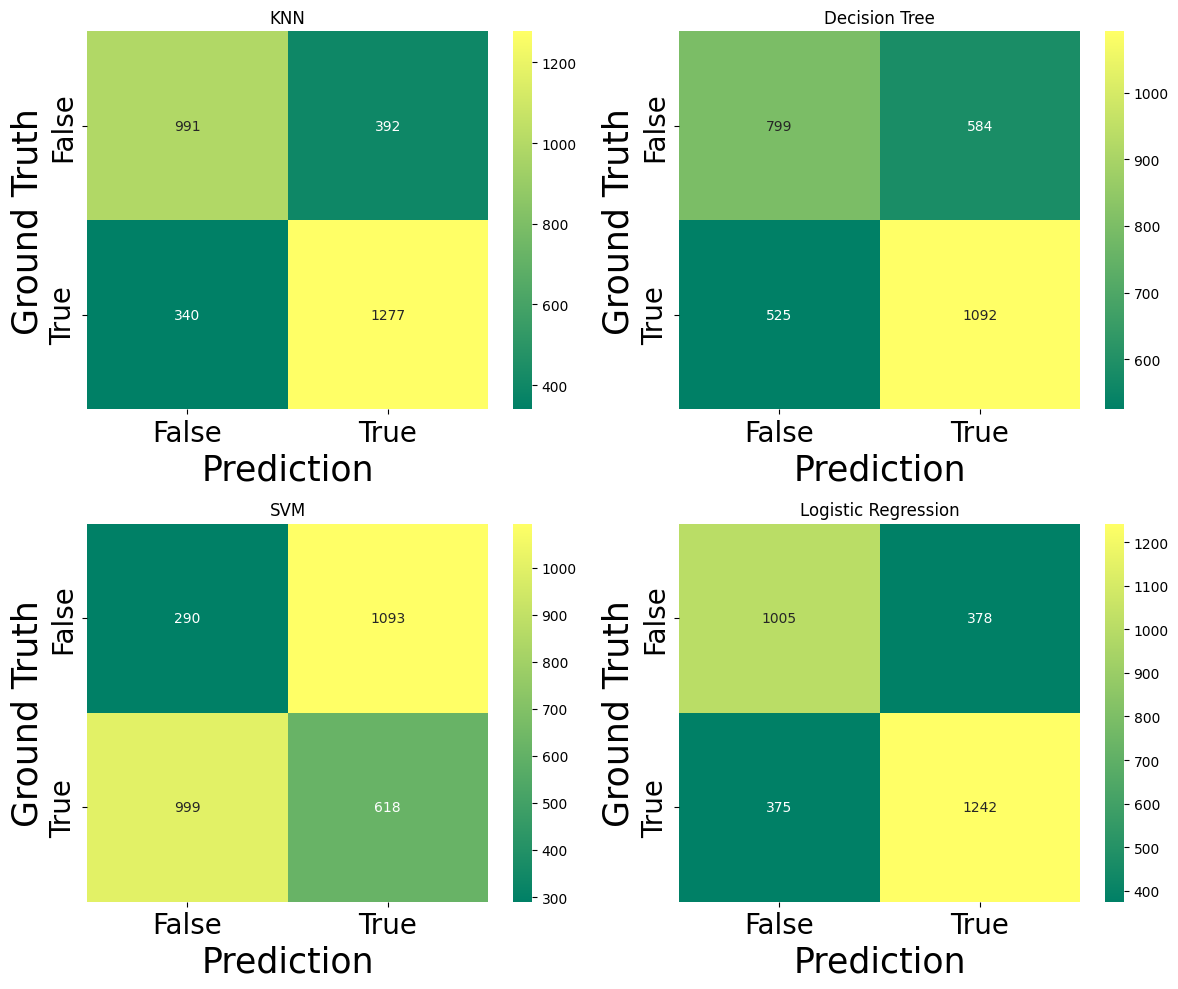

In [60]:
fig, axList = plt.subplots(nrows=2, ncols=2)
axList = axList.flatten()
fig.set_size_inches(12, 10)


models = coeff_labels = ['KNN', 'Decision Tree', 'SVM', 'Logistic Regression']
cm = [confusion_matrix(y_val, knn_pred),
      confusion_matrix(y_val, tree_pred),
      confusion_matrix(y_val, svm_pred),
      confusion_matrix(y_val, log_pred)]
labels = ['False', 'True']

for ax,model, idx in zip(axList, models, range(0,4)):
    sns.heatmap(cm[idx], ax=ax, annot=True, fmt='d', cmap='summer')
    ax.set(title=model)
    ax.set_xticklabels(labels, fontsize=20)
    ax.set_yticklabels(labels, fontsize=20)
    ax.set_xlabel('Prediction', fontsize=25)
    ax.set_ylabel('Ground Truth', fontsize=25)
    
plt.tight_layout()

# Model Evaluation using Test Set

In [61]:
knn_pred=neigh.predict(X_test)
jc1=jaccard_score(y_test, knn_pred)
fs1=f1_score(y_test, knn_pred)

tree_pred=modeltree.predict(X_test)
jc2=jaccard_score(y_test, tree_pred)
fs2=f1_score(y_test, tree_pred)

svm_pred=clf.predict(X_test)
jc3=jaccard_score(y_test, svm_pred)
fs3=f1_score(y_test, svm_pred)

log_pred=LR.predict(X_test)
proba=LR.predict_proba(X_test)
jc4=jaccard_score(y_test, log_pred)
fs4=f1_score(y_test, log_pred)  
ll4=log_loss(y_test, proba)

list_jc = [jc1, jc2, jc3, jc4]
list_fs = [fs1, fs2, fs3, fs4]
list_ll = ['NA', 'NA', 'NA', ll4]

In [62]:
# Metric report for diffrent Models on the Validation set

df = pd.DataFrame(list_jc, index=['KNN','Decision Tree','SVM','Logistic Regression'])
df.columns = ['Jaccard']
df.insert(loc=1, column='F1-score', value=list_fs)
df.insert(loc=2, column='LogLoss', value=list_ll)
df.columns.name = 'Algorithm'
df

Algorithm,Jaccard,F1-score,LogLoss
KNN,0.643902,0.783383,NA
Decision Tree,0.516071,0.680800,NA
SVM,0.237034,0.383230,NA
Logistic Regression,0.624326,0.768720,0.559229


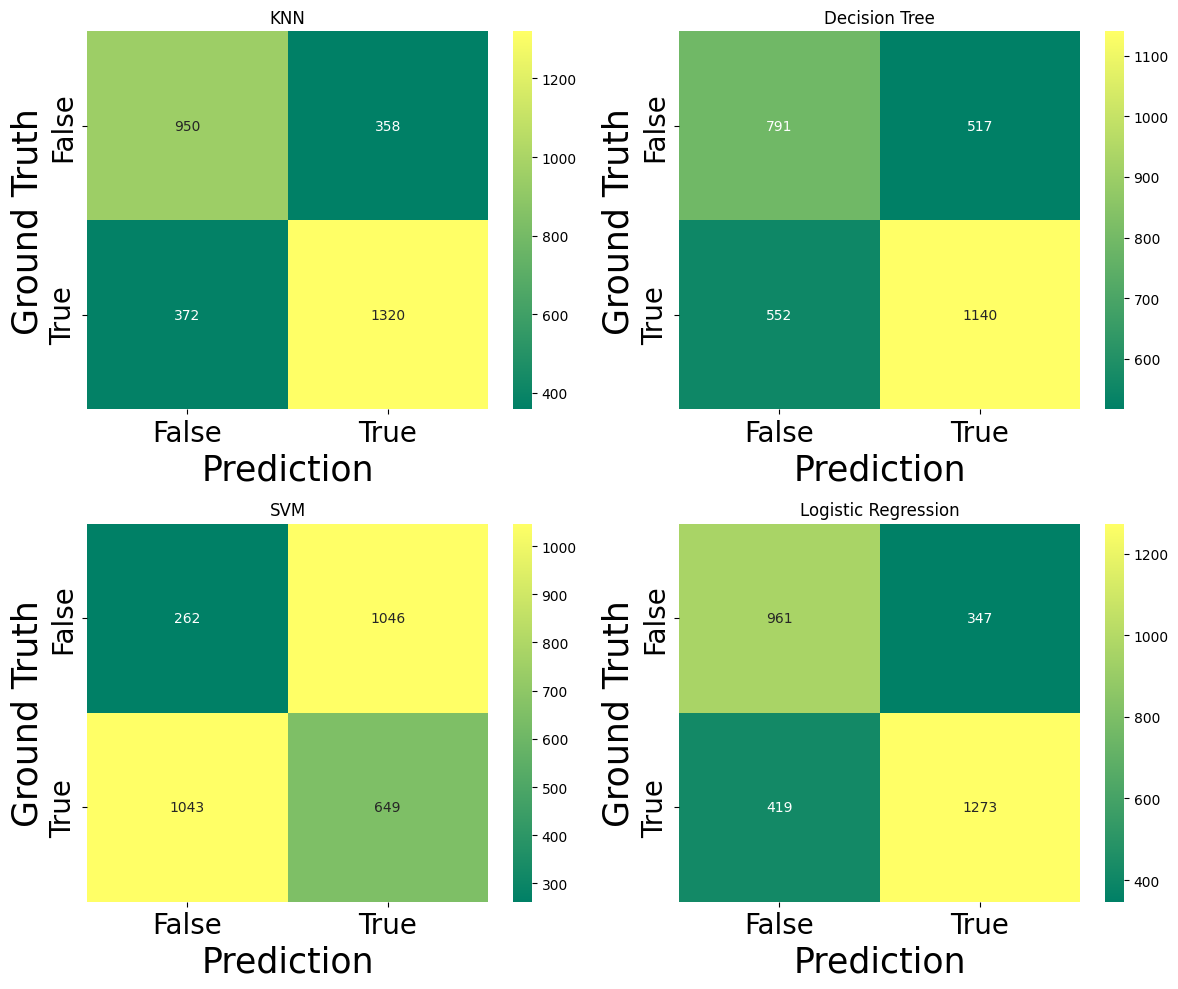

In [63]:
fig, axList = plt.subplots(nrows=2, ncols=2)
axList = axList.flatten()
fig.set_size_inches(12, 10)


models = coeff_labels = ['KNN', 'Decision Tree', 'SVM', 'Logistic Regression']
cm = [confusion_matrix(y_test, knn_pred),
      confusion_matrix(y_test, tree_pred),
      confusion_matrix(y_test, svm_pred),
      confusion_matrix(y_test, log_pred)]
labels = ['False', 'True']

for ax,model, idx in zip(axList, models, range(0,4)):
    sns.heatmap(cm[idx], ax=ax, annot=True, fmt='d', cmap='summer')
    ax.set(title=model)
    ax.set_xticklabels(labels, fontsize=20)
    ax.set_yticklabels(labels, fontsize=20)
    ax.set_xlabel('Prediction', fontsize=25)
    ax.set_ylabel('Ground Truth', fontsize=25)
    
plt.tight_layout()